In [1]:
#importing common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
df = pd.read_csv('placement.csv')

In [3]:
#viewing the first 5 rows
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package(in lpa)')

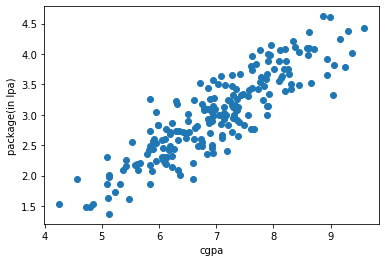

In [4]:
# plotting the data
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('cgpa')
plt.ylabel('package(in lpa)')

In [5]:
# splitting the independent and dependent variables
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
print(X,'\n')
print(y)

     cgpa
0    6.89
1    5.12
2    7.82
3    7.42
4    6.94
..    ...
195  6.93
196  5.89
197  7.21
198  7.63
199  6.22

[200 rows x 1 columns] 

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64


In [7]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [8]:
#importing linear reg and ft the train data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
print(X_train)

     cgpa
137  7.14
163  8.93
111  5.42
123  5.10
109  7.77
..    ...
43   7.66
22   6.14
72   7.78
15   7.25
168  8.65

[160 rows x 1 columns]


In [10]:
print(X_test)

     cgpa
112  8.58
29   7.15
182  5.88
199  6.22
193  4.57
85   4.79
10   5.32
54   6.86
115  8.35
35   6.87
12   8.94
92   7.90
13   6.93
126  5.91
174  7.32
2    7.82
44   5.09
3    7.42
113  6.94
14   7.73
23   6.19
25   7.28
6    6.73
134  7.20
165  8.21
173  6.75
45   7.87
65   7.60
48   8.63
122  5.12
178  8.15
64   7.36
9    8.31
57   6.60
78   6.59
71   7.47
128  7.93
176  6.29
131  6.37
53   6.47


In [11]:
print(y_train)

137    3.13
163    3.91
111    2.25
123    2.30
109    4.06
       ... 
43     2.76
22     2.30
72     3.62
15     3.23
168    3.52
Name: package, Length: 160, dtype: float64


In [12]:
print(y_test)

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64


In [13]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

C:\Users\vcyad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'Package(in lpa)')

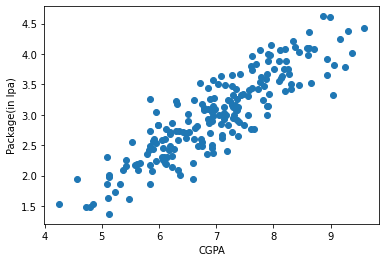

In [14]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [15]:
m = lr.coef_  #coefficient
print('m', m)
b = lr.intercept_ #intercept
print('b', b)

m [0.55795197]
b -0.8961119222429144


In [16]:
(0.55795197 * 8.58) + (-0.8961119222429144)

3.8911159803570854

In [17]:
#y = mx+b
package =  m * X_train.iloc[0] + b
package

cgpa    3.087665
Name: 137, dtype: float64

In [18]:
m * 9.5 + b 

array([4.40443183])

In [19]:
m * 100 + b

array([54.89908542])

#### Regression metrics

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
y_pred = lr.predict(X_test)

In [22]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [23]:
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

Mean absolute error: 0.2884710931878175


In [24]:
print('Mean squared error:', mean_squared_error(y_test, y_pred))

Mean squared error: 0.12129235313495527


In [25]:
print('Root mean absolute error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Root mean absolute error: 0.34827051717731616


In [26]:
print('R2 score:', r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2 score: 0.780730147510384


In [27]:
X_test.shape

(40, 1)

In [28]:
#adjusted r2 score
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415